In [430]:
import pandas as pd
import numpy as np
import sys
from datetime import datetime
from matplotlib import pyplot as plt

In [443]:
labels_file = '/NVME/decrypted/ukbb/labels/2_data_extraction_BMI_height_IMT/ukb42432.csv'
qc_file = '/HDD/data/UKBB/fundus/qc/ageCorrected_ventiles2_ids.txt'
qc = pd.read_csv(qc_file, header=None)
qc = qc[0]

noqc_file = '/HDD/data/UKBB/fundus/qc/noQC_ids.txt'
noqc = pd.read_csv(noqc_file, header=None)
noqc = noqc[0]

In [444]:
columns = ['eid']
columns = columns + ['31-0.0', '34-0.0', '53-0.0', '53-1.0']
columns = columns + ['2976-0.0', '3627-0.0', '3894-0.0', '4012-0.0', '4056-0.0', '4079-0.0']
columns = columns + ['4080-'+str(i)+'.0' for i in range(0,2)]
columns = columns + ['21022-0.0']
columns = columns + ['22009-0.'+str(i) for i in range(1,41)] # PCs
columns = columns + ['40000-'+str(i)+'.0' for i in range(0,2)] # deaths
# 31: sex
# 34: year of birth
# 53: dates visiting assessment center

colnames = []
colnames = colnames + ['sex', 'year_of_birth', 'date_of_visit_0', 'date_of_visit_1']
colnames = colnames + ['age_diabetes','age_angina','age_heartattack','age_DVT','age_stroke','DBP'] 
colnames = colnames + ['sbp_' + str(i) for i in range(0,2)]
colnames = colnames + ['age_at_recruitment']
colnames = colnames + ['pc_' + str(i) for i in range(1,41)]
colnames = colnames + ['date_of_death_' + str(i) for i in range(0,2)]

In [445]:
labels = pd.read_csv(labels_file, sep=",", usecols=columns, index_col='eid', skiprows=[1])

/tmp/ipykernel_59419/1736056138.py:1: DtypeWarning: Columns (393) have mixed types. Specify dtype option on import or set low_memory=False.
  labels = pd.read_csv(labels_file, sep=",", usecols=columns, index_col='eid', skiprows=[1])


(array([70541.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14272.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

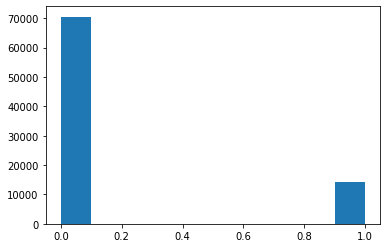

In [446]:
plt.hist(qc_status)

In [447]:
# here I verified that no people died before visiting assessment center the first time

tmp = labels[['53-0.0','40000-0.0']]
tmp.dropna(inplace=True)
tmp

ded = [datetime.strptime(i, '%Y-%m-%d') for i in tmp['40000-0.0']]
dst = [datetime.strptime(i, '%Y-%m-%d') for i in tmp['53-0.0']]

/tmp/ipykernel_59419/3826531375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace=True)


In [448]:
# same for second time at assessment center: no people dying before visiting observed

tmp = labels[['53-1.0','40000-0.0']]
tmp.dropna(inplace=True)
tmp

ded = [datetime.strptime(i, '%Y-%m-%d') for i in tmp['40000-0.0']]
dst = [datetime.strptime(i, '%Y-%m-%d') for i in tmp['53-1.0']]

/tmp/ipykernel_59419/116467508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.dropna(inplace=True)


In [449]:
diff=[]
for i in range(0,len(dst)):
    diff.append((ded[i]-dst[i]).days)

(array([19., 25., 44., 40., 41., 58., 60., 46., 60., 19.]),
 array([  43. ,  238.4,  433.8,  629.2,  824.6, 1020. , 1215.4, 1410.8,
        1606.2, 1801.6, 1997. ]),
 <BarContainer object of 10 artists>)

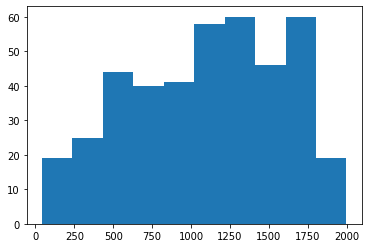

In [450]:
plt.hist(diff)

In [451]:
labels = labels.loc[qc]
labels.columns = colnames

In [452]:
len(labels)

79842

In [453]:
labels.iloc[0:100]

,sex,year_of_birth,date_of_visit_0,date_of_visit_1,age_diabetes,age_angina,age_heartattack,age_DVT,age_stroke,DBP,...,pc_33,pc_34,pc_35,pc_36,pc_37,pc_38,pc_39,pc_40,date_of_death_0,date_of_death_1
eid,,,,,,,,,,,,,,,,,,,,,
1018804,1,1947,2010-03-04,NaN,NaN,NaN,NaN,NaN,NaN,101.0,...,0.769079,2.057580,3.988340,0.222295,1.658990,1.612040,2.666580,-1.812860,NaN,NaN
1018843,0,1950,2009-02-23,2013-02-16,NaN,NaN,NaN,NaN,NaN,73.0,...,1.237860,0.866791,-1.558770,0.141922,-0.494483,4.520710,-2.053080,-2.638150,NaN,NaN
1018862,1,1957,2010-04-15,NaN,NaN,48.0,NaN,NaN,NaN,75.0,...,-0.865840,-1.821630,0.132315,3.892790,1.582670,-4.175680,-0.556594,-2.606490,NaN,NaN
1018901,1,1956,2010-05-15,NaN,NaN,NaN,NaN,NaN,NaN,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1018948,1,1951,2010-03-24,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,1.242980,0.221462,-2.131340,1.295320,-2.661530,3.182070,-0.206609,0.965935,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024842,1,1963,2010-02-22,NaN,NaN,NaN,NaN,NaN,NaN,83.0,...,0.018291,0.563873,-1.921400,-3.614780,1.108210,-1.087990,-0.343080,0.822573,NaN,NaN
1024986,0,1955,2010-02-08,NaN,NaN,48.0,48.0,NaN,NaN,92.0,...,2.037420,1.832270,-2.706590,0.939891,-2.445760,-0.908233,1.030810,0.198539,NaN,NaN
1025003,0,1952,2010-04-28,NaN,NaN,NaN,NaN,NaN,NaN,66.0,...,-2.627630,-2.369420,0.432958,5.139050,-1.211320,-0.602296,-1.169830,1.418530,NaN,NaN


In [454]:
# phenotypes

pheno = pd.read_csv('/NVME/decrypted/ukbb/fundus/phenofiles/multitrait_no_qc.csv', sep=' ')
# pheno = pd.read_csv('/SSD/home/michael/cox/2022_05_04_vd_zekavat_vs_ours_qqnorm.csv', sep=' ')
pheno.replace(-999.0000, np.nan, inplace=True)
instances = pd.read_csv('/NVME/decrypted/ukbb/fundus/phenofiles/multitrait_no_qc_instances.csv', dtype="Int64", index_col=0)
# instances = pd.read_csv('/SSD/home/michael/cox/2022_05_04_vd_zekavat_vs_ours_instances.csv', dtype="Int64", index_col=0)
pheno.index=instances.index

# account for missing genotypes
idx = [i for i in labels.index if i in pheno.index]
labels = labels.loc[idx]

# account that qc here could be different
pheno = pheno.loc[idx]
instances = instances.loc[idx]

In [455]:
len(labels), len(pheno), len(instances)

(77046, 77046, 77046)

In [456]:
labels

,sex,year_of_birth,date_of_visit_0,date_of_visit_1,age_diabetes,age_angina,age_heartattack,age_DVT,age_stroke,DBP,...,pc_33,pc_34,pc_35,pc_36,pc_37,pc_38,pc_39,pc_40,date_of_death_0,date_of_death_1
eid,,,,,,,,,,,,,,,,,,,,,
1018804,1,1947,2010-03-04,NaN,NaN,NaN,NaN,NaN,NaN,101.0,...,0.769079,2.057580,3.988340,0.222295,1.658990,1.612040,2.666580,-1.812860,NaN,NaN
1018843,0,1950,2009-02-23,2013-02-16,NaN,NaN,NaN,NaN,NaN,73.0,...,1.237860,0.866791,-1.558770,0.141922,-0.494483,4.520710,-2.053080,-2.638150,NaN,NaN
1018862,1,1957,2010-04-15,NaN,NaN,48.0,NaN,NaN,NaN,75.0,...,-0.865840,-1.821630,0.132315,3.892790,1.582670,-4.175680,-0.556594,-2.606490,NaN,NaN
1018948,1,1951,2010-03-24,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,1.242980,0.221462,-2.131340,1.295320,-2.661530,3.182070,-0.206609,0.965935,NaN,NaN
1019000,0,1944,2010-01-27,NaN,NaN,58.0,NaN,NaN,NaN,91.0,...,-0.585590,-1.874780,-0.233512,3.376220,-3.061380,1.617420,-1.041060,2.062940,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024991,0,1946,2010-03-30,NaN,NaN,NaN,NaN,NaN,NaN,85.0,...,-0.692489,-0.499541,-1.094820,-0.942723,1.776490,-1.470660,1.293020,2.737620,NaN,NaN
6025027,0,1953,2010-02-24,NaN,NaN,NaN,NaN,NaN,NaN,88.0,...,2.170350,0.700811,5.981200,1.589930,-1.773910,-4.432430,2.020840,3.707970,NaN,NaN
6025098,0,1946,2010-03-30,NaN,NaN,NaN,NaN,NaN,NaN,103.0,...,0.176348,-2.153830,4.271120,-0.599645,-1.131100,-1.134350,-0.117127,-1.107730,NaN,NaN


In [457]:
# choose date of visit for each participant
# if fundus was taken at instance 0, date_of_visit_0 is chosen, else 1

date_of_visit = []
for idx,row in instances.iterrows():
    if row['instance'] == 0:
        date_of_visit.append(labels['date_of_visit_0'].loc[idx])
    elif row['instance'] == 1:
        date_of_visit.append(labels['date_of_visit_1'].loc[idx])
    else:
        print('problem')
        
labels['date_of_visit'] = date_of_visit
# labels.drop(columns=['date_of_visit_0','date_of_visit_1'],inplace=True)

In [458]:
def get_age_at_visit(date_of_visit):
    out = []
    for j,i in enumerate(date_of_visit):
        try:
            year_of_visit = str(i).split("-")[0]
            year_of_visit = int(year_of_visit)
            age_at_visit = year_of_visit - labels['year_of_birth'].iloc[j]
            day_of_visit = datetime.strptime(i, '%Y-%m-%d').timetuple().tm_yday
            age_at_visit = np.round(age_at_visit + np.array(day_of_visit) / 365.25 - 1/2, 2) # last term: -1/2 : we know only year of birth, so on average they will be half a year younger than indicated by year of birth
            out.append(age_at_visit)
        except Exception as e:
            out.append(np.nan)
    return out

# labels['age_at_visit_0'] = get_age_at_visit(labels['date_of_visit_0'])
# labels['age_at_visit_1'] = get_age_at_visit(labels['date_of_visit_1'])
labels['age_at_visit'] = get_age_at_visit(labels['date_of_visit'])

In [459]:
# add pheno
for i in pheno.columns:
    labels[i] = pheno[i].loc[labels.index]
# labels['DF_artery'] = pheno['DF_artery'].loc[labels.index]
# labels['DF_vein'] = pheno['DF_vein'].loc[labels.index]
# labels['FD_all'] = pheno['FD_all'].loc[labels.index]
# labels['FD_artery'] = pheno['FD_artery'].loc[labels.index]
# labels['FD_vein'] = pheno['FD_vein'].loc[labels.index]
# labels['VD_orig_all_Zekavat'] = pheno['VD_orig_all_Zekavat'].loc[labels.index]
# labels['VD_orig_all_ours'] = pheno['VD_orig_all'].loc[labels.index]

# write full df
labels.to_csv('cox_df_mortality_ventile2qc.csv')

In [429]:
len(pheno.columns)

92

In [176]:
len(labels)

68025

In [177]:
labels.iloc[700:5000]

,sex,year_of_birth,date_of_visit_0,date_of_visit_1,age_diabetes,age_angina,age_heartattack,age_DVT,age_stroke,DBP,...,date_of_death_0,date_of_death_1,date_of_visit,age_at_visit,DF_all,DF_artery,DF_vein,FD_all,FD_artery,FD_vein
eid,,,,,,,,,,,,,,,,,,,,,
1067280,0,1948,2010-06-15,NaN,NaN,NaN,NaN,NaN,NaN,79.0,...,2016-04-13,NaN,2010-06-15,61.95,1.019525,1.0172,1.018475,1.512982,1.376638,1.377748
1067377,0,1950,2010-06-18,NaN,58.0,NaN,NaN,48.0,NaN,84.0,...,NaN,NaN,2010-06-18,59.96,1.026350,1.0265,1.022700,1.334475,1.244878,1.194539
1067408,0,1951,2008-11-26,2012-09-10,NaN,NaN,NaN,NaN,NaN,82.0,...,NaN,NaN,2012-09-10,61.20,NaN,NaN,NaN,NaN,NaN,NaN
1067415,0,1965,2010-05-12,NaN,NaN,NaN,NaN,NaN,NaN,88.0,...,NaN,NaN,2010-05-12,44.86,NaN,NaN,NaN,NaN,NaN,NaN
1067520,1,1960,2010-03-30,2013-03-04,NaN,NaN,NaN,NaN,NaN,86.0,...,NaN,NaN,2010-03-30,49.74,1.034150,1.0273,1.036500,1.542986,1.421966,1.391816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384015,1,1969,2010-05-04,NaN,NaN,NaN,NaN,NaN,NaN,77.0,...,NaN,NaN,2010-05-04,40.84,1.028500,1.0311,1.023200,1.555648,1.416525,1.417812
1384041,0,1966,2010-01-12,NaN,NaN,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,2010-01-12,43.53,1.023000,1.0256,1.022700,1.554885,1.427764,1.397587
1384094,0,1946,2010-04-09,NaN,NaN,NaN,NaN,NaN,NaN,80.0,...,NaN,NaN,2010-04-09,63.77,1.030250,1.0259,1.028025,1.424023,1.300160,1.298977


# Showcase, how age_at_visit differs from age_at_recruitment

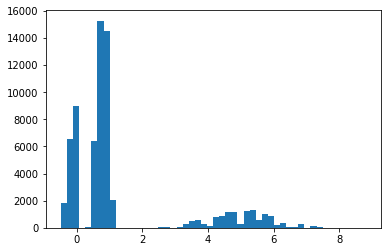

In [192]:
from matplotlib import pyplot as plt
plt.hist(labels['age_at_visit'] - labels['age_at_recruitment'], 50);

In [312]:
labels = labels.loc[qc]
imgs = pd.read_csv("/NVME/decrypted/ukbb/fundus/phenotypes/2022-05-03_vascular_density_zekavat.csv", index_col='Unnamed: 0')

In [313]:
len(labels)

57572

In [314]:
out = [(i,str(i)+"_21015_0_0.png") for i in labels.index if str(i)+"_21015_0_0.png" in imgs.index]

label_idx = [i[0] for i in out]
img_idx = [i[1] for i in out]

In [321]:
labels = labels.loc[label_idx]
labels['VD_orig_all'] = imgs['VD_orig_all'].loc[img_idx].values

In [323]:
labels.to_csv('cox_vd_left_eye.csv')

In [325]:
labels

,sex,year_of_birth,date_of_visit_1,date_of_visit_2,age_at_recruitment,pc_1,pc_2,pc_3,pc_4,pc_5,...,pc_34,pc_35,pc_36,pc_37,pc_38,pc_39,pc_40,date_of_death_1,date_of_death_2,VD_orig_all
eid,,,,,,,,,,,,,,,,,,,,,
1018804,1,1947,2010-03-04,NaN,62,-10.77990,5.08585,-1.027930,0.515175,-3.42803,...,2.057580,3.988340,0.222295,1.658990,1.612040,2.666580,-1.812860,NaN,NaN,0.094196
1018862,1,1957,2010-04-15,NaN,53,-10.87480,2.76951,-1.937710,1.163650,-7.41277,...,-1.821630,0.132315,3.892790,1.582670,-4.175680,-0.556594,-2.606490,NaN,NaN,0.078604
1018901,1,1956,2010-05-15,NaN,54,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.089937
1018948,1,1951,2010-03-24,NaN,59,-12.08810,3.18479,-0.410956,-1.818160,-1.79380,...,0.221462,-2.131340,1.295320,-2.661530,3.182070,-0.206609,0.965935,NaN,NaN,0.110144
1019000,0,1944,2010-01-27,NaN,65,-11.43950,2.31030,-1.787630,-3.015810,-3.43224,...,-1.874780,-0.233512,3.376220,-3.061380,1.617420,-1.041060,2.062940,NaN,NaN,0.080182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024991,0,1946,2010-03-30,NaN,63,-7.79740,3.53392,-1.263120,-2.881350,4.96094,...,-0.499541,-1.094820,-0.942723,1.776490,-1.470660,1.293020,2.737620,NaN,NaN,0.080623
6025027,0,1953,2010-02-24,NaN,56,-8.59844,4.43537,-2.145820,-0.714285,-4.47719,...,0.700811,5.981200,1.589930,-1.773910,-4.432430,2.020840,3.707970,NaN,NaN,0.094162
6025098,0,1946,2010-03-30,NaN,63,-13.62640,4.11973,1.379840,-0.799251,-10.57490,...,-2.153830,4.271120,-0.599645,-1.131100,-1.134350,-0.117127,-1.107730,NaN,NaN,0.018052


# Binning QC pass against filtered

In [234]:
labels_file = '/NVME/decrypted/ukbb/labels/2_data_extraction_BMI_height_IMT/ukb42432.csv'
qc_file = '/HDD/data/UKBB/fundus/qc/ageCorrected_ventiles5_ids.txt'
qc = pd.read_csv(qc_file, header=None)
qc = qc[0]

noqc_file = '/HDD/data/UKBB/fundus/qc/noQC_ids.txt'
noqc = pd.read_csv(noqc_file, header=None)
noqc = noqc[0]

In [235]:
qc_status = [0 if i in qc.values else 1 for i in noqc.values]

84813

In [259]:
# phenotypes

pheno = pd.read_csv('/SSD/home/michael/cox/2022_04_21_multitrait_ageCorrectedVentile5QC_40PCs.csv', sep=' ')
# pheno = pd.read_csv('/SSD/home/michael/cox/2022_05_04_vd_zekavat_vs_ours_qqnorm.csv', sep=' ')
pheno.replace(-999.0000, np.nan, inplace=True)
instances = pd.read_csv('/SSD/home/michael/cox/2022_04_21_multitrait_ageCorrectedVentile5QC_40PCs_instances.csv', dtype="Int64", index_col=0)

# few images somehow missing
missing_in_noqc = list(set(instances.index) - set(noqc))

# instances = pd.read_csv('/SSD/home/michael/cox/2022_05_04_vd_zekavat_vs_ours_instances.csv', dtype="Int64", index_col=0)
pheno.index=instances.index

# account for missing genotypes
idx = [i for i in labels.index if i in pheno.index]
labels = labels.loc[idx]

# account that qc here could be different
pheno = pheno.loc[idx]
instances = instances.loc[idx]

In [255]:
instances = pd.read_csv('/SSD/home/michael/cox/2022_04_21_multitrait_ageCorrectedVentile5QC_40PCs_instances.csv', dtype="Int64", index_col=0)

In [260]:
missing_in_noqc

[3390691,
 5294340,
 1069032,
 2454664,
 2450291,
 1315571,
 4554164,
 4858678,
 2237719,
 1018771,
 1132251]

In [273]:
missing_in_noqc

[3390691,
 5294340,
 1069032,
 2454664,
 2450291,
 1315571,
 4554164,
 4858678,
 2237719,
 1018771,
 1132251]

In [282]:
col_qcdf = qc_status + [np.nan for i in range(0,len(missing_in_noqc))]

qc_df = pd.DataFrame({'qc':col_qcdf}, index=list(noqc.values) + missing_in_noqc)

In [287]:
import seaborn as sns

<AxesSubplot:xlabel='DF_all', ylabel='qc'>

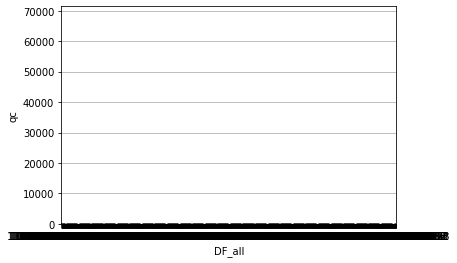

In [297]:
pheno['qc'].hist()

sns.boxplot(x='DF_all', y='qc',data=pheno)

<AxesSubplot:>

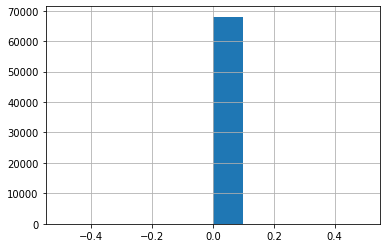

In [298]:
pheno['qc'].hist()